# Исследование объявлений о продаже квартир

## Общее описание проекта 
В распоряжении данные сервиса о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно изучить влияние различных факторов на рыночную стоимость объектов недвижимости. 

## Описание признакового пространства 
По каждой квартире на продажу доступны следующие признаки. 

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition| сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Инструкции по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Предобработка данных
- Обработать аномальные наблюдения;
- Привести данные к необходимым типам;
- Исследовать дублирующиеся записи;
- Обработать пропущенные значения.

Шаг 3. Посчитайте и добавьте в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). 
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Шаг 5. Проверьте гипотезы о равенстве стоимости квартир в центральной части Санкт-Петербурге и других квартир.

# Шаг 1. Откройте файл с данными и изучите общую информацию.
<a class="anchor" id="step1"></a>

## Импорт библиотек

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('project7.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Общее ознакомление с данными

В целях проверки корректности загруженных данных, ознакомления с предоставленным набором, распечатаем десять первых (метод `.head()`) и последних (метод `.tail()`) записей.     

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Информация о признаках

Вывод информации о типах признаков, количестве записей, количестве ненулевых значений

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

По признакам каждого типа получены описательные статистики

In [ ]:
for t in set(data.dtypes):
    print("Переменные типа",t)
    print(data.select_dtypes(include = [t]).describe(),'\n')

Переменные типа object
       first_day_exposition is_apartment    locality_name
count                 23699         2775            23650
unique                 1491            2              364
top     2018-02-01T00:00:00        False  Санкт-Петербург
freq                    368         2725            15721 

Переменные типа int64
       total_images         rooms         floor
count  23699.000000  23699.000000  23699.000000
mean       9.858475      2.070636      5.892358
std        5.682529      1.078405      4.885249
min        0.000000      0.000000      1.000000
25%        6.000000      1.000000      2.000000
50%        9.000000      2.000000      4.000000
75%       14.000000      3.000000      8.000000
max       50.000000     19.000000     33.000000 

Переменные типа bool
       studio open_plan
count   23699     23699
unique      2         2
top     False     False
freq    23550     23632 

Переменные типа float64
         last_price    total_area  ceiling_height  floors_tota

**Текст, выделенный полужирным шрифтом**## Выводы по шагу 1

Результаты проведенного первичного обследования полученной выборки позволяют сделать следующие выводы: 
<a class="anchor" id="enclus1"></a>
1. Структура полученной выборки позволяет применять для обработки данных  библиотеку `pandas`. Сформированный датафрейм имеет 23699 строк и 22 столбца.
2. Наименование признаков не требует корректировки, за исключением признака `floor`, который лучше переименовать из-за наличия методов с таким же именем.
3. В отдельных признаках содержатся пропуски и аномальные наблюдения, требуется преобразование типов. Детальная информация по каждому признаку преставлена в таблице.

|№|Признак|Расшифровка|Проблемы с признаком|
|-:|-------------:|:------------|:------------|
|1|total_images| число фотографий квартиры в объявлении| установленный тип данных соответствует смыслу признака; пропусков нет; аномальных значений нет (хотя 50 фото многовато)|
|2|last_price|цена на момент снятия с публикации|проблем с признаком не обнаружено|
|3|total_area|площадь квартиры в квадратных метрах (м²)| проблем с признаком не обнаружено, однако заметим, что в основном продаются небольшие по площади квартиры порядка 70 $м^2$     |
|4|first_day_exposition|дата публикации|пропусков нет|
|5|rooms|число комнат|имеется квартира без комнат `0!` и маловероятное число комнат `19!`; большинство квартир 2-х и 3-х комнатные, что адекватно соотносится с признаком `total_area`|
|6|ceiling_height|высота потолков(м)|установленный тип данных соответствует смыслу признака; имеются пропуски и аномальные значения (высота потолка 1 м и 100 м); большинство квартир имеют высоту потолков 2.50-2.80 м --- стандартная высота потолка|
|7|floors_total|всего этажей в доме|заменить тип данных на целочисленный; имеется небольшое число пропусков; максимальный этаж -- 60| 
|8|living_area|жилая площадь в квадратных метрах(м²)|имеется небольшое число пропусков; минимальная площадь 2(м²) -- маловато будет для жилого помещания, максимальная площадь составляет 409.7(м²) -- очень большая квартира|
|9|floor|этаж| пропусков нет, аномалии не наблюдаются; следует изменить название признака, поскольку есть функции с таким именем|
|10|is_apartment|апартаменты (булев тип)|изменить тип данных на булев (bool); пропусков много, но возможно это просто указание того, что это не апартаменты|
|11|kitchen_area|площадь кухни в квадратных метрах (м²)|имеются пропуски, маловероятные значения площади кухни: минимальное 1.3(м²), а максимальное 112 (м²)|
|12|balcony|число балконов|именить тип данных на целочисленный; имеются пропуски; аномалий не замечано, но есть 5 балконов|
|13|locality_name|название населённого пункта|имеются малочисленные пропуски|
|14|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|имеются пропуски; минимальное значение 0 м -- квартира в здании аэропорта!!!|
|15|cityCenters_nearest|расстояние до центра города (м)|имеются пропуски; практически 66 км до центра города -- интересный факт|
|16|parks_around3000|число парков в радиусе 3 км|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|17|parks_nearest|расстояние до ближайшего парка (м)|имеются пропуски в данных; аномалий не замечано|
|18|ponds_around3000|число водоёмов в радиусе 3 км|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|19|ponds_nearest|расстояние до ближайшего водоёма (м)|имеются пропуски; аномалий не замечано|
|20|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|21|studio|квартира-студия (булев тип)|пропусков нет|                 
|22|open_plan|свободная планировка (булев тип)|пропусков нет|

**На этом исчерпывается информация, которую удалось получить по результатам первичного обследования предоставленного набора данных.** 

# Шаг 2. Предобработка данных
<a class="anchor" id="step2"></a>

## План работ на шагу 2

На данном шаге планируется выполнить следующие работы:
1. Переименовать признаки; 
2. Оценить количество дубликатов и, при наличии, удалить их;
3. Исследовать аномальные наблюдения;
4. Восстановить пропуски;
5. Заменить типы признаков.

## Переименование признаков

Имя признака `floor` совпадает с методом `floor()` из библиотеки `math`, т.е. является зарезервированным именем. Переименуем `floor` $\to$ `storey`. Для этого воспользуемся методом `rename()`. Сделаем это по месту в уже существующем датафрейме. Проверим результат.

In [ ]:
data.rename({'floor': 'storey'}, axis=1, inplace=True)

In [ ]:
data.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'storey',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

## Замена типов признаков

[**Выше отмечалось**](#enclus1), что для ряда признаков необходимо изменить тип. В нижеследующей таблице указаны признаки, для которых нужно сделать это преобразование.

|Признак|Текущий тип данных|Необходимый тип данных|
|-------------:|:------------|:------------|
|floors_total|float64|int64|
|balcony|float64|int64|
|parks_around3000|float64|int64|
|ponds_around3000|float64|int64|
|days_exposition|float64|int64|
|is_apartment|object|bool|

Для замены типа данных воспользуемся цепочкой .astype().dtypes, передав в качестве параметра словарь, содержащий пары
{имя переменной : новый тип,…}

In [ ]:
#data.astype({'floors_total':'int64', 'balcony':'int64', 'parks_around3000':'int64', 'ponds_around3000':'int64', 'days_exposition':'int64', 'is_apartment':'bool'}).dtypes)

## Обработка дубликатов

Воспользуемся цепочкой методов `.duplicated().sum()` для обнаружения дубликатов, а методом `.drop_duplicates()` для их удаления.

In [ ]:
data.duplicated().sum()

0

## Обработка пропущенных значений

При обработке пропущенных значений по каждому признаку будем придерживаться следующей стратегии: выявим и, при необходимости, устраним аномальные наблюдения, а затем будет заполнять пропущенные значения. 

План работ:
1. Получение общей информации о числе пропущенных значений по каждому признаку;
2. Работа с аномальными значения по каждому признаку;
3. Заполнение пропущенных значений. 

### Общая информация о пропущенных значениях

Для наглядного представления структуры исходной выборки с пропусками построим так называемую "тепловую карту". По горизонтальной оси расположены признаки, по вертикальной – номера записей/строк. Желтый цвет соответствует пропускам данных.

Сформируем также датафрейм, содержащий имена признаков с пропусками, количество и процент пропущенных значений по признаку.

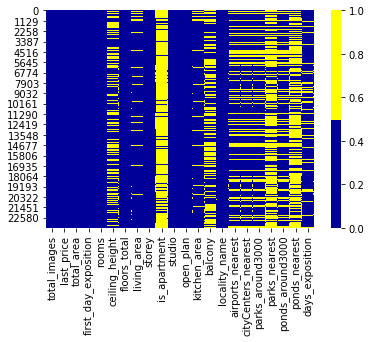

In [ ]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
a = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

In [ ]:
df_missing = pd.DataFrame(columns=['name', 'count_missig_value', 'pct_missig_value'])
j = 0
for i, col in enumerate(data.columns):
    pct_missing = np.mean(data[col].isnull())
    val_missing = np.sum(data[col].isnull())
    if pct_missing != 0:
        df_missing.loc[j] = [col, val_missing, pct_missing]
        j +=1
print('Сводная таблица по пропускам', '\n', df_missing.sort_values(by='count_missig_value', ascending=False))

Сводная таблица по пропускам 
                    name count_missig_value  pct_missig_value
3          is_apartment              20924          0.882906
10        parks_nearest              15620          0.659100
12        ponds_nearest              14589          0.615596
5               balcony              11519          0.486054
0        ceiling_height               9195          0.387991
7      airports_nearest               5542          0.233850
8   cityCenters_nearest               5519          0.232879
9      parks_around3000               5518          0.232837
11     ponds_around3000               5518          0.232837
13      days_exposition               3181          0.134225
4          kitchen_area               2278          0.096122
2           living_area               1903          0.080299
1          floors_total                 86          0.003629
6         locality_name                 49          0.002068


Комментировать таблицу пока не имеет смысла, в ней только факты и они говорят о том, что с пропусками придется повозиться. Пойдем в порядке убывания числа пропущенных значений. По каждому признаку будем отсеивать аномалии, а затем восстанавливать пропущенные значения.

### Заполнение значений признака `locality_name`

[**Напомним**](#enclus1), что данный признак имеет небольшое число пропущенных значений. При обработке будем придерживаться следующей схемы: оценим распределение объявлений по населенным пунктам, заполним пропуски [**модой**](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)#:~:text=%D0%9C%D0%BE%CC%81%D0%B4%D0%B0%20%E2%80%94%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%D0%BE%20%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%20%D0%BD%D0%B0%D0%B1%D0%BB%D1%8E%D0%B4%D0%B5%D0%BD%D0%B8%D0%B9,%D0%BC%D0%BE%D0%B4%D0%B0%20%E2%80%94%206%20%D0%B8%209).) по признаку. Начнем.

Оценим количество пропусков

In [ ]:
data['locality_name'].isna().sum()

49

Построим распределение объявлений по населенным пунктам 

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок станции Лужайка        1
деревня Большое Рейзино        1
посёлок Плоское                1
поселок Гончарово              1
поселок Лисий Нос              1
Name: locality_name, Length: 364, dtype: int64

Обратим внимание, что тип населеного пункта "поселок" пишется либо через "е", либо через "ё". В целях унификации везде заменим "ё" на "е", ну и "Ё" на "Е".

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('Ё', 'Е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Видим, что в названии некоторых населенных пунктов, типы населенных пунктов содержат смысловые синонимы:

поселок  <--- городской поселок, городского типа, городской, коттеджный 

деревня (деревень больше) <--- село

садовое товарищество <--- садоводческое некоммерческое товарищество

В целях унификации проведем замену. 

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace(' городского типа', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace(' при железнодорожной', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')
data['locality_name'] = data['locality_name'].str.replace('село ', 'деревня ')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'деревня Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зел

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург          15721
поселок Мурино             556
поселок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
деревня Большой Сабск        1
поселок Кондратьево          1
деревня Пижма                1
деревня Щеглово              1
деревня Снегиревка           1
Name: locality_name, Length: 319, dtype: int64

In [ ]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

In [ ]:
data['locality_name'].isnull().sum()

0

### Заполнение значений признака `is_apartment`  

По данному признаку очевидной представляется гипотеза, что если для квартиры пропущено значение этого признака, то это не апартаменты. Отталкиваясь от этой гипотезы, заполним пропуски по этому признаку значениями `False`. Проверим цепочкой `.isna().sum()` отсутствие пропусков и методом `.unique()` посмотрим уникальные значения признака.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Число пропущенных значений по признаку {:s} равно {:d}'.format('is_apartment',data['is_apartment'].isna().sum()))
list(data['is_apartment'].unique())

Число пропущенных значений по признаку is_apartment равно 0


[False, True]

### Заполнение значений признаков `parks_nearest` и `parks_around3000`, `ponds_nearest` и `ponds_around3000`

Представляется, что пары признаков, отвечающие за парки и водоемы нужно обрабатывать вместе. Именно признаки каждой пары. Видимо ценность квартиры определяется, в том числе, шаговой (3 км) доступностью парков и водоемов. Отталкиваясь от этой гипотезы и будем проводить работы по поиску и обработке аномалий, а также последующему заполнению пропусков.

#### Заполнение значений признаков `parks_nearest` и `parks_around3000`

Посмотрим сколько парков за пределами 3 км. 

In [ ]:
data[data.parks_nearest > 3000]['parks_nearest'].value_counts()

3190.0    2
3013.0    1
3064.0    1
Name: parks_nearest, dtype: int64

Этих парков всего 4! штуки, находящихся на удалении 13, 64 и 190 м от заветной границы в 3 км. Спишем эти метры на погрешность прибора, ну и если пройдено уже 3 км, то дополнительных 190 м это как раз заминка, для тех кто увлекается бегом. 

Заменим эти 4 значения на 3000, пропуски пока оставим не тронутыми. Для этого воспользуемся освоенным в теоретической части спринта методов `.where()`, ну и проверим.  

In [ ]:
data.parks_nearest.where(data.parks_nearest.isna() | (data.parks_nearest <=3000), other=3000, inplace=True)
data[data.parks_nearest > 3000]['parks_nearest'].value_counts()

Series([], Name: parks_nearest, dtype: int64)

С аномалиями в `parks_nearest`. Займемся `parks_around3000`. Проверим, а нет ли записей, для которых в `parks_around3000` пропущенные значения, но расстояние до парка известно. Если такие записи есть, то для них заполним значение признака `parks_around3000` 1 (если расстояние известно, то хотя бы один парк должен быть).

In [ ]:
mis_val = data[data.parks_nearest.notna()]['parks_around3000'].isna().sum()
if mis_val != 0:
    data.parks_around3000 = data[data.parks_nearest.notna()].parks_around3000.fillna(1)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака parks_around3000'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')



Гипотеза не подтвердилась


Ну и хорошо, что таких записей нет, позже проверим водоемы. 
Повторим этот трюк, только в обратном направлении. У записи проверим наличие парков в радиусе 3 км (`parks_around3000`), если такие есть, а поле по переменной `parks_nearest` пустое, то заполним его значением 3000.

In [ ]:
mis_val = data[data.parks_around3000.notna()]['parks_nearest'].isna().sum()
if mis_val != 0:
    data.parks_nearest = data[data.parks_around3000.notna()].parks_nearest.fillna(3000)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака parks_nearest'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза подтвердилась. Заполнено  10102 значений признака parks_nearest


In [ ]:
data[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       5518
parks_around3000    5518
dtype: int64

Больше никаких гипотез относительно признаков `parks_nearest` и `parks_around3000` нет. Заполним оставшиеся пропуски по признаку `parks_around3000` значением 0 (нет парков в радиусе 3 км), а по признаку `parks_nearest` пропуски заменим значением 5000 (в шаговой доступности парков нет, только ехать на машине). Почему выбрана такая стратегия заполнения: к настоящему времени исчерпана вся информация по этой паре признаков, если парков нет, то и дойти пешком до них нельзя. Ну и традиционная проверка. 

In [ ]:
data['parks_around3000'].fillna(0, inplace=True)
data['parks_nearest'].fillna(5000, inplace=True)
data[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       0
parks_around3000    0
dtype: int64

#### Заполнение значений признаков `ponds_nearest` и `ponds_around3000`

Обработку этих признаком проведем по той же схеме, что для признаком `parks_nearest` и `parks_around3000`. В связи с этим промежуточные комментации

In [ ]:
data[data.ponds_nearest > 3000]['ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

Здорово, если водоемы есть, то они ближе 3 км.

Проверим наличие записей, для которых известно расстояние до водоема, а число водоемов не указано. И в обратную сторону.

In [ ]:
mis_val = data[data.ponds_nearest.notna()]['ponds_around3000'].isna().sum()
if mis_val != 0:
    data.ponds_around3000 = data[data.ponds_nearest.notna()].ponds_around3000.fillna(1)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака ponds_around3000'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')


Гипотеза не подтвердилась


In [ ]:
mis_val = data[data.ponds_around3000.notna()]['ponds_nearest'].isna().sum()
if mis_val != 0:
    data.ponds_nearest = data[data.ponds_around3000.notna()].ponds_nearest.fillna(3000)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака ponds_nearest'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза подтвердилась. Заполнено  9071 значений признака ponds_nearest


Заполним оставшиеся пропуски по признаку `ponds_around3000` -- 0 (нет водоемов), а пропуски признака `ponds_nearest` -- 5000 (пешком дойти до водоема сложно)   

In [ ]:
data['ponds_around3000'].fillna(0, inplace=True)
data['ponds_nearest'].fillna(5000, inplace=True)
data[['ponds_nearest', 'ponds_around3000']].isna().sum()

ponds_nearest       0
ponds_around3000    0
dtype: int64

### Заполнение значений признака `balcony`

Видимо здесь речь идет все-таки не о балконах, а о лоджиях (автор имел дело с установщика окон и они прояснили разницу в этих понятиях). Автор жил в нескольких многоэтажках и везде количество балконов было не больше количества комнат в квартире. Наблюдались случаи, когда в одной комнате было два балкона, балконы на кухне -- распространенная практика. 
Посчитаем количество записей, в которых количество балконов больше числа комнат + 2 (вдруг все-таки в комнате 2 балкона и еще и на кухне). Квертиры свободной планировки и студии не рассматриваем.    

In [ ]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [ ]:
anomal_val = data[(~data.studio) & (~data.open_plan) & (data.balcony >= data.rooms+2)].shape[0]
if anomal_val != 0:
    data.drop(data[(~data.open_plan) & (~data.studio) & (data.balcony > data.rooms + 2)].index, inplace=True)
    print('Найдено {:d} записей с аномально большим количеством балконов. Записи удалены.'.format(anomal_val))
else:
    print('Не найдено записей с аномально большим количеством балконов.')

Найдено 353 записей с аномально большим количеством балконов. Записи удалены.


In [ ]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     196
4.0     167
3.0      81
Name: balcony, dtype: int64

Видим, что уменьшилось число записей, в которых по либо 4, либо по 5 балконов. Других гипотез по поиску аномалий в признаке `balcony` нет. Заполним пропуски по этому признаку 0, если не указано, значит балкона нет. Логика здесь такова: наличие балкона, как представляется, добавляет ценности квартире и делает ее более привлекательной. Следовательно, если балкон есть, то для повышения привлекательно предложения его надо указывать.

In [ ]:
data.balcony.fillna(0, inplace=True)
data['balcony'].isna().sum()

0

### Заполнение значений признака `ceiling_height`

Для поиска аномалий по данному признаку автор изучил вопрос о требованиях к высоте потолка. Оказывается есть нормы (процитируем документ [**СТРОИТЕЛЬНЫЕ НОРМЫ И ПРАВИЛА. ЖИЛЫЕ ЗДАНИЯ**](http://www.rosinox.ru/docs/snip-2.08.01-89/#:~:text=%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0%20%D0%B6%D0%B8%D0%BB%D1%8B%D1%85%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%BE%D1%82%20%D0%BF%D0%BE%D0%BB%D0%B0,%D0%BD%D0%B5%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%203%2C0%20%D0%BC%20.), определяющий требования к высоте потолков в жилых помещениях. Приведем их.

**1.1*. Высота жилых помещений от пола до потолка должна быть не менее 2,5 м, для климатических подрайонов IА, IБ, IГ, IД, IIА - не менее 2,7 м.
Высоту этажей от пола до пола для жилых домов социального назначения рекомендуется принимать не более 2,8 м, для климатических подрайонов IА, IБ, IГ, IД, IIА - не более 3,0 м.
Высота внутриквартирных коридоров должна быть не менее 2,1 м.**

Изучив вопрос [**дополнительно**](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011), установлено, что в "сталинках" высота потолка варьируется от 3 до 3.5 метров, но есть и квартиры с потолками более 4 метров, относящиеся к классу "люкс".   

Квартиры-студии здесь четких норм нет, едининственно, что удалось найти, это 3.2 м --- минимальная высота потока, при которой можно уже организовывать подобную квартиру, также автору известно о продаже квартир с 6-метровыми потолками, позиционирующихся именно как квартиры-студии.    

Для выявления критических (недопустимых) значений потолка установим минимально возможную высоту в 2.1 метра (вдруг высоту потолка измеряли в коридоре). 

In [ ]:
data.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,6.50,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,False,...,6.00,1.0,Луга,NaN,NaN,0.0,5000.0,0.0,5000.0,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,False,...,8.80,2.0,Тосно,NaN,NaN,0.0,5000.0,0.0,5000.0,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0.0,поселок Мга,NaN,NaN,0.0,5000.0,0.0,5000.0,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,False,...,NaN,0.0,Луга,NaN,NaN,0.0,5000.0,0.0,5000.0,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,False,...,10.10,0.0,поселок Металлострой,25268.0,26980.0,0.0,3000.0,0.0,3000.0,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,False,...,12.00,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,6.00,0.0,Выборг,NaN,NaN,0.0,5000.0,0.0,5000.0,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,False,...,6.00,0.0,Выборг,NaN,NaN,0.0,5000.0,0.0,5000.0,282.0


Квартиры с потолками ниже 2.1 метра есть. Их всего 14 штук. Удалим эти записи. Ну и проверим результат.

In [ ]:
data.drop(data[data.ceiling_height < 2.1].index, inplace=True)
data.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Ограничим высоту потолков любой квартиры 6 метрами и посмотрим на результат. Для лучшего понимания геометрии "нехороших" квартир возьмем для них максимальные значения признака площадь `living_area`.  

In [ ]:
data.query('ceiling_height > 6').pivot_table(index="ceiling_height", values="living_area", aggfunc='max')

,living_area
ceiling_height,
8.0,41.0
8.3,19.3
10.3,15.5
14.0,32.4
20.0,53.2
22.6,35.0
24.0,19.5
25.0,32.0
26.0,21.3


Подозрительными являются высоты потолков `27.0`, `25.0`, `32.0`, `22.6`, `27.5`, `26.0` и `24.0`. Для реальных высот потолков они являются маловероятными, а вот ошибками оператора при вводе значений вполне могут быть. Оставим записи с этими значениями потолков, предварительно поделив их на 10. Остальные записи удалим. Традиционно проверим результат.

In [ ]:
data.loc[(data.ceiling_height >= 22.6) & (data.ceiling_height <= 32), 'ceiling_height'] /= 10
data.drop(data[data.ceiling_height > 6].index, inplace=True)
data.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Разобравшись с аномалиями в признаке `ceiling_height`, восстановим его значения. Будем руководствоваться информацией, полученной из [**внешних источников**](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011) о нормах высоты потолков.

Для квартир с пропусками по признаку `ceiling_height` заполним их нормативным значением высоты потолка 2.64 м.    

In [ ]:
data.ceiling_height.fillna(2.64, inplace=True)
data['ceiling_height'].isnull().sum()

0

### Заполнение значений признака `airports_nearest`

Доступный по расстоянию аэропорт это, наверное, хорошо, но очень шумно. Бегло ознакомившись с впоросом [**тут**](https://www.m24.ru/articles/kvartira/22012014/35075) и [**тут**](https://www.vedomosti.ru/economics/articles/2019/10/27/814810-pravitelstvo-pozvolit-stroit) стало понятно, что тема не простая. Желательно строить не ближе 30 км от здания аэропорта, ближе нужно согласовывать. Видимо минимальным предельно допустимым является расстояние до аэропорта 5 км. Вооружившись этой информации будем искать аномальные наблюдения.   

In [ ]:
data[data.airports_nearest < 5000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,3000.0,0.0,3000.0,60.0


Вот и "нехорошая" квартира в здании аэропорта. Видим, что это всего одна запись, удалить ее.

In [ ]:
data.drop(data[data.airports_nearest < 5000].index, inplace=True)

C аномально минимальными значениями расстояний разобрались, про корректность [**максимального значения**](#enclus1) (чуть меньше 85 км) сказать ничего нельзя. Будем считать, что с аномальными значениями по признаку разобрались. Перейдем к вопросу восстановления пропусков.  

В качестве рабочей примем гипотезу, что для квартир, находящихся в одном населенном, расстояние до ближайшего аэропорта будет "примерно" одинаковым. 

In [ ]:
data['airports_nearest'].isna().sum()

5503

In [ ]:
data['airports_nearest'] = data.groupby('locality_name')['airports_nearest'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
data['airports_nearest'].isna().sum()

4834

Для оставшихся записей расстояние до ближайшего аэропорта положим равным максимальному расстоянию в выборке. Если не указано расстояние, значит аэропорт далеко. Предварительно посмотрим для квартир из каких населенных пунктов неизвестно расстояние до аэропорта.      

In [ ]:
data[data['airports_nearest'].isna()]['locality_name'].unique()

array(['поселок Янино-1', 'Сертолово', 'деревня Кудрово', 'Коммунар',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кировск', 'деревня Новое Девяткино', 'поселок Лебяжье',
       'поселок Сиверский', 'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'деревня Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок Романовка', 'поселок Бугры', 'поселок Рощино',
       'Кириши', 'Луга', 'Волосово', 'Отрадное', 'деревня Павлово',
       'поселок Оредеж', 'деревня Копорье', 'Тихвин', 'пос

In [ ]:
max_dist = data['airports_nearest'].max()
data['airports_nearest'].fillna(max_dist, inplace = True)
data['airports_nearest'].isna().sum()

0

### Заполнение значений признака `cityCenters_nearest`

При обработке пропусков по переменной `cityCenters_nearest` будем придерживаться той же стратегии, что для переменной `airports_nearest`: если известно в каком населенном пункте расположена квартира, то соответствующее значение заполним групповым средним известных расстояний до центра в этом населенном пункте; остальным пропущенным значениям будем присваивать максимальное значение расстояния.     

In [ ]:
data['cityCenters_nearest'].isna().sum()

5480

Для известных населенных пунктов заполняем расстояние до центра групповыми средними. 

In [ ]:
data['cityCenters_nearest'] = data.groupby('locality_name')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
data['cityCenters_nearest'].isna().sum()

4834

Оставшиеся значения по признаку `cityCenters_nearest` заполняем максимальным расстоянием до центра. 

In [ ]:
max_dist = data['cityCenters_nearest'].max()
data['cityCenters_nearest'].fillna(max_dist, inplace = True)
data['cityCenters_nearest'].isna().sum()

0

### Заполнение значений признака `days_exposition`

Никаких оригинальных гипотез относительно заполнения пропущенных значений этого признака нет. Применим все ту же стратегию: если известен населенный пункт, то заменим пропущенные значения числа дней размещения объявления групповым средним по этому населенному пункту; остальные значения заполним [**медианой**](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)#:~:text=%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%CC%81%D0%BD%D0%B0%20(%D0%BE%D1%82%20%D0%BB%D0%B0%D1%82.,%D0%BD%D0%B5%D0%B3%D0%BE%2C%20%D0%B0%20%D0%B4%D1%80%D1%83%D0%B3%D0%B0%D1%8F%20%D0%BF%D0%BE%D0%BB%D0%BE%D0%B2%D0%B8%D0%BD%D0%B0%20%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B5.), как статистикой более устойчивой к выбросам

In [ ]:
data['days_exposition'].isna().sum()

3155

In [ ]:
#data['days_exposition'] = data.groupby('locality_name')['days_exposition'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#data['days_exposition'].isna().sum()

In [ ]:
median_days = 0
data['days_exposition'].fillna(median_days, inplace = True)
data['days_exposition'].isna().sum()

0

### Заполнение значений признака `kitchen_area`

[**Напомним**](#enclus1), что данный признак содержит маловероятные значения площади кухни: минимальное 1.3(м²), а максимальное 112 (м²). Исследование вопроса снова привело нас к нормам [**СП 54.13330.2016 Здания жилые многоквартирные**](https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php#:~:text=%E2%96%BA%20%D0%9E%D0%B1%D1%89%D0%B5%D0%B9%20%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9%20%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D1%8B%20%D0%B2%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0%D1%85%20%D1%81%20%D1%87%D0%B8%D1%81%D0%BB%D0%BE%D0%BC%20%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%20%D0%B4%D0%B2%D0%B5,%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%D1%8E%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%205%20%D0%BC%C2%B2.). Цитируем

5.7 Площадь квартир социального использования государственного и муниципального жилищных фондов согласно ЖК РФ должна быть не менее: <a class="anchor" id="norm1"></a>

► Общей жилой комнаты в однокомнатной квартире - 14 м².  

► Общей жилой комнаты в квартирах с числом комнат две и более - 16 м². 

► Спальни - 8 м² (на двух человек - 10 м²); кухни - 8 м².

► Кухонной зоны в кухне-столовой - 6 м².

► В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м².

**Таким образом**, зафиксируем минимальную площадь кухни в 5 м² (автор помнит так называемые [**"малосемейки"**](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%BE%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%D0%BA%D0%B0), кухни площадью 8 м² там точно не было). Хотя, как выясняется из статьи, все зависит от типовой серии проекта. Это для обычных квартир.

В выборке могут быть еще и квартиры-студии, а также квартиры со свободной планировкой. Если автор правильно понял, то там четко определенной кухни может и не быть. 

Дальнейшее изучение вопроса было связано с [**соотношением жилой и нежилой площадей квартиры**](https://communal-control.ru/advice/view?id=16#:~:text=%D0%96%D0%B8%D0%BB%D0%B0%D1%8F%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%E2%80%93%20%D1%8D%D1%82%D0%BE%20%D1%81%D1%83%D0%BC%D0%BC%D0%B0%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B5%D0%B9,%2C%20%D0%B1%D0%B0%D0%BB%D0%BA%D0%BE%D0%BD%D0%BE%D0%B2%2C%20%D0%B2%D0%B5%D1%80%D0%B0%D0%BD%D0%B4%20%D0%B8%20%D1%82%D0%B5%D1%80%D1%80%D0%B0%D1%81.&text=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D1%8B%20%D1%82%D0%B0%D0%BA%D0%B8%D0%B5%3A%20%D0%B4%D0%BB%D1%8F%20%D0%BB%D0%BE%D0%B4%D0%B6%D0%B8%D0%B9%20%2D%200,%D1%85%D0%BE%D0%BB%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%BA%D0%BB%D0%B0%D0%B4%D0%BE%D0%B2%D1%8B%D1%85%20%2D%201%2C0.). Цитируем [**источник**](https://orel.cian.ru/stati-pravilo-kuhni-kakie-metry-ne-byvajut-lishnimi-217180/) "..оптимальное соотношение жилых и нежилых помещений (большинство специалистов считают, что нежилые могут занимать в зависимости от потребностей владельца от 15 до 40% всей площади квартиры)." 

Имеем: Общая площадь квартиры = Жилая площадь + Нежилая площадь.

Площадь балконов не входит в Общую площадь.  

Кухня, ровно как вспомомогальные помещения (кладовки) и санузлы, относится к нежилой площади. 

Поскольку в предоставленной выборке имеется признак `total_area` (площадь квартиры в квадратных метрах) и в нем нет пропусков, то его значения можно использовать для восстановления значений площади кухни для всех типов квартир. 

Имеем следующее, полученное автором, теоретическое соотношение между общей площадью и нежилой

Площадь кухни = max[5, Общая площадь * 0.2 - Площадь санузлов].     

Оператор max() используется для того, чтобы квартиры с маленькой общей площадью имели кухню не менее 5 $м^2$. Коэффициент `0.2` взят из цитата выше (от 15 до 40% всей площади квартиры). В реальности, конечно, нельзя говорить о постоянности подобной связи (есть большие и маленькие кухни при больших площадях квартиры).

[**Площадь санузла**](remonttool.ru/dizajn-i-interer/standartnye-i-minimalnye-gabarity-sanuzla-vybor-optimalnogo-razmera.html) положим равным 6 $м^2$ --- и пусть владельцы больших квартир не обижаются.

Итого, имеем следующую формулу для оценки (восстановления значений) площади кухни

Площадь кухни = max[5, Общая площадь * 0.2 - 6]

**КОММЕНТАРИЙ:** Выбранные коэффициенты данной формулы, безусловно, могут подлежать критики. В целом, однако, подход имеет место быть. Фактически имеем задачу линейной регрессии: зависимая переменная --- площадь кухни; независимая переменная --- общая площадь; свободный член --- площадь санузлов. Но, тема пока не изучена, возможно дальше и будет в проектах. 

In [ ]:
data[(data.studio | data.open_plan)]['kitchen_area'].isna().sum()

216

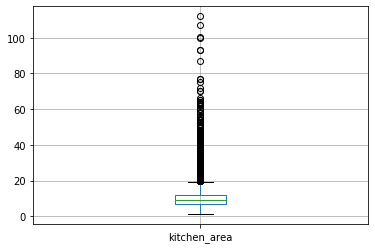

In [ ]:
data[~(data.studio | data.open_plan)].boxplot(column=['kitchen_area'])

In [ ]:
data['kitchen_area'].isna().sum()

2271

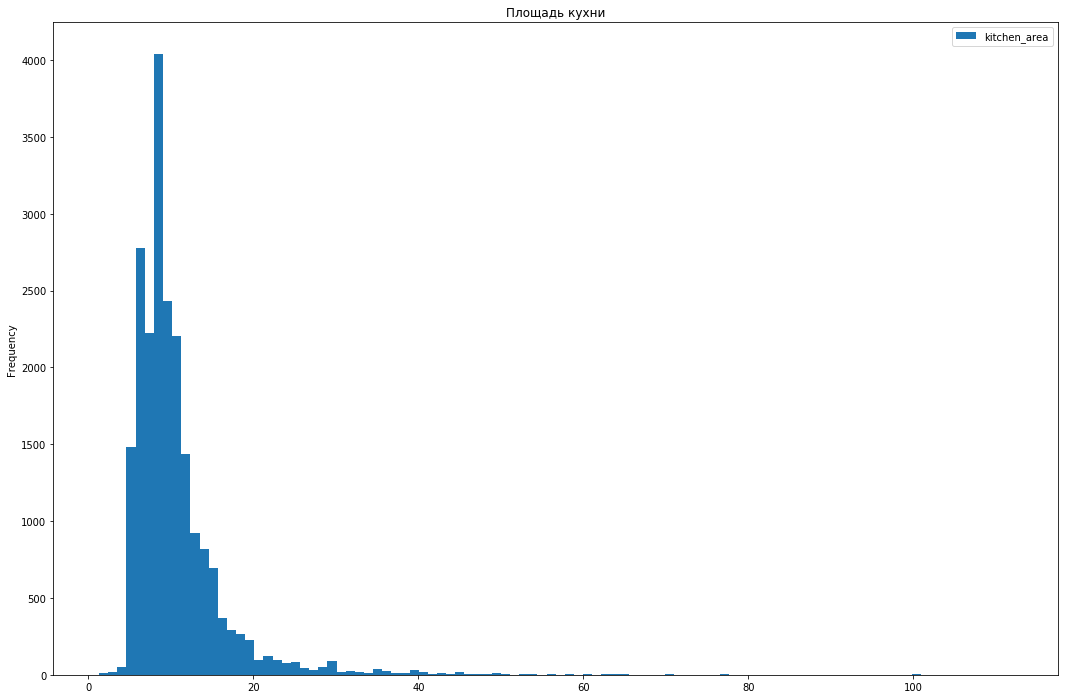

In [ ]:
data[~(data.studio | data.open_plan)].plot(y='kitchen_area', title='Площадь кухни', kind='hist', bins=100, figsize=(18,12))

**Ящик с усами и гистограмма** позволяют сделать вывод, что для большинства квартир площадь кухни не превышает 20 $м^2$. Аномальными будем считать кухни с площадью более 60 $м^2$. Эти записи будут удаляться.

In [ ]:
data.query('~(studio | open_plan) & (kitchen_area < 5 | kitchen_area > 60)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.4,1,False,...,4.9,0.0,Кировск,84869.0,65968.0,0.0,5000.0,0.0,5000.0,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.64,5.0,30.0,3,False,...,4.5,0.0,Гатчина,84869.0,65968.0,0.0,5000.0,0.0,5000.0,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5.0,38.5,5,False,...,4.5,0.0,Кириши,84869.0,65968.0,0.0,5000.0,0.0,5000.0,0.0
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.0,4,False,...,77.0,0.0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,3000.0,1.0,411.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22849,6,2380000.0,25.0,2016-03-22T00:00:00,1,2.64,25.0,19.0,15,False,...,4.0,1.0,поселок Шушары,13461.0,19247.0,0.0,3000.0,1.0,351.0,140.0
22980,19,24500000.0,155.4,2017-10-10T00:00:00,3,3.00,4.0,72.0,2,False,...,65.0,0.0,Санкт-Петербург,43758.0,15461.0,1.0,756.0,2.0,278.0,325.0
23110,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.90,2.0,20.0,1,False,...,4.0,0.0,поселок Стрельна,27006.0,23832.0,0.0,3000.0,2.0,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.30,1.0,33.0,1,False,...,3.5,0.0,Высоцк,84869.0,65968.0,0.0,5000.0,0.0,5000.0,281.0


In [ ]:
data.drop(data[~(data.studio | data.open_plan) & ((data.kitchen_area < 5) | (data.kitchen_area > 60))].index, inplace=True)
data.query('~(studio | open_plan) & (kitchen_area < 5 | kitchen_area > 60)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data['kitchen_area'].isna().sum()

2271

Здесь возникли затруднения, что реализовать формулу оценки площади кухни в одну строку. Сделал в несколько: 
1. По столбцу `total_area` посчитал под формуле нужные значения;
2. Присвоил промежуточному Series значения для восстановления;
3. Выполнил восстановление по индексу.

In [ ]:
dt = np.where(data[data.kitchen_area.isnull()]['total_area']*0.2-6 > 5, data[data.kitchen_area.isnull()]['total_area']*0.2-6, 5 )
miss_value = pd.Series(dt, index = data[data.kitchen_area.isnull()]['total_area'].index)
data['kitchen_area'] = data['kitchen_area'].fillna(miss_value)

In [ ]:
data['kitchen_area'].isna().sum()

0

### Заполнение значений признака `living_area`

[**Выше**](#norm1) было указано, что минимальная жилая площадь составляет 14 м². Установим это значение в качетве нижней границы признака `living_area`. Верхнюю определим по ящику с усами и гистограмме.  

Здесь стратегия заполнения пропусков проста: общую площадь квартиры - (площадь кухни + площадь санузла).

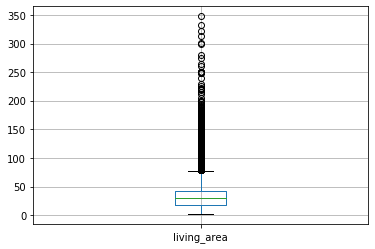

In [ ]:
data.boxplot(column=['living_area'])

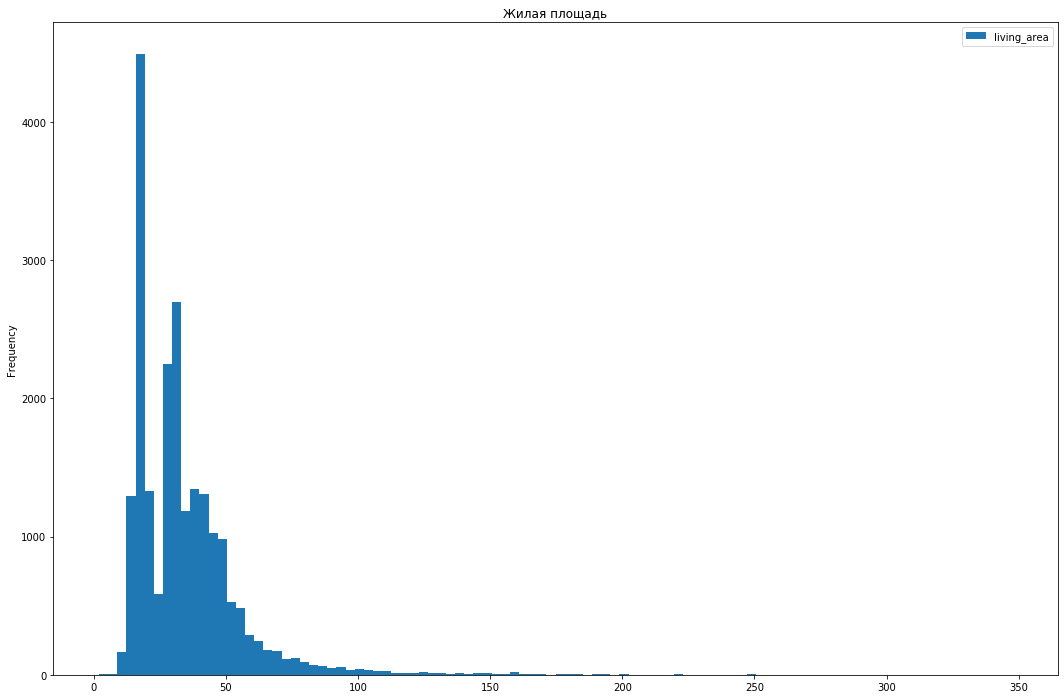

In [ ]:
data.plot(y='living_area', title='Жилая площадь', kind='hist', bins=100, figsize=(18,12))

Верхнюю границу жилой площади определим в 200 кв.м

In [ ]:
data.query('living_area < 14 | living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,3000.0,0.0,3000.0,155.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10.0,12.00,3,False,...,13.00,0.0,садовое товарищество Новая Ропша,84869.0,65968.0,0.0,5000.0,0.0,5000.0,0.0
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.30,7,False,...,6.30,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,0.0
248,7,4100000.0,31.00,2015-08-02T00:00:00,1,3.00,17.0,10.00,6,False,...,5.00,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,3000.0,637.0
352,3,5496074.0,48.60,2016-04-25T00:00:00,1,2.64,11.0,13.00,3,False,...,15.00,2.0,Санкт-Петербург,23609.0,5299.0,0.0,3000.0,1.0,433.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.64,19.0,10.08,10,False,...,16.88,0.0,Санкт-Петербург,37006.0,15157.0,0.0,3000.0,0.0,3000.0,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,False,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24T00:00:00,3,3.00,8.0,3.00,8,False,...,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
23673,9,3100000.0,23.00,2018-03-19T00:00:00,1,2.80,9.0,12.60,1,False,...,5.00,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0


Записей достаточно много, но нормы есть нормы. Хотя, если внимательно посмотреть, то за 3 кв. м. просят 64990000!!!!
Будем удалять.

In [ ]:
data.drop(data[(data.living_area < 14) | (data.living_area > 200)].index, inplace=True)
data.query('living_area < 14 | living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Заполняем пропуски по **формуле**

In [ ]:
data['living_area'] = data['living_area'].fillna(data['total_area'] - (data['kitchen_area'] + 6))
data['living_area'].isna().sum()

0

В квартире жилая площадь не может быть больше или равной общей площади.

In [ ]:
data.drop(data[data.living_area >= data.total_area].index, inplace=True)

### Заполнение значений признака `floors_total`

Аномальные значения отберем до ящику и гистограмме.

Пропущенные значения этажности дома заменим медианой этажности всех домов, находящихся в одном населенном пункте домом, у которого этажность пропущена. 

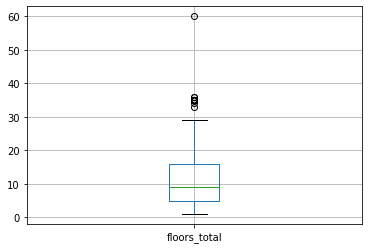

In [ ]:
data.boxplot(column=['floors_total'])

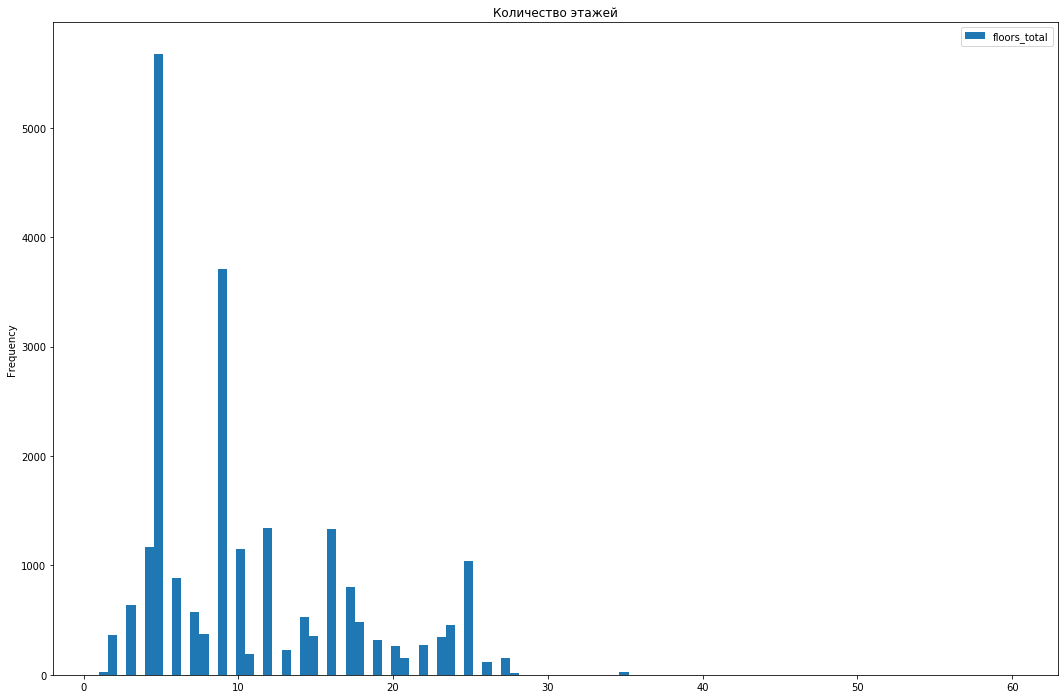

In [ ]:
data.plot(y='floors_total', title='Количество этажей', kind='hist', bins=100, figsize=(18,12))

Нет зданий с числом этажей, равным 0. Можно сказать, что здания с количеством этажей больше 30 это очень большая редкость. 

In [ ]:
data.query('floors_total >= 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.64,36.0,21.4,28,False,...,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,11.0
871,14,7777777.0,75.0,2017-11-16T00:00:00,2,2.64,35.0,40.5,23,False,...,11.7,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06T00:00:00,2,2.64,35.0,39.0,15,False,...,20.5,2.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08T00:00:00,1,2.65,34.0,18.0,23,False,...,5.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17T00:00:00,2,2.80,35.0,34.4,30,False,...,13.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,0.0
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
2966,9,4300000.0,37.0,2017-08-08T00:00:00,1,2.64,35.0,14.0,15,False,...,10.4,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,50.0
4855,12,5500000.0,50.0,2017-06-22T00:00:00,1,2.80,35.0,22.0,4,False,...,13.0,0.0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35.0,14.0,26,False,...,5.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,198.0
5808,12,4590000.0,43.0,2018-10-19T00:00:00,1,2.64,35.0,14.0,11,False,...,15.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,3000.0,3.0,80.0,82.0


In [ ]:
data.drop(data[data.floors_total >= 30].index, inplace=True)

Замена пропущенных значений этажности дома медианой этажности всех домов, находящихся в одном населенном пункте. 

In [ ]:
data['floors_total'] = data.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.median()))

In [ ]:
data['floors_total'].isna().sum()

0

In [ ]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
storey                  0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

## Замена типов признаков

[**Выше отмечалось**](#enclus1), что для ряда признаков необходимо изменить тип. В нижеследующей таблице указаны признаки, для которых нужно сделать это преобразование.

|Признак|Текущий тип данных|Необходимый тип данных|
|-------------:|:------------|:------------|
|floors_total|float64|int64|
|balcony|float64|int64|
|parks_around3000|float64|int64|
|ponds_around3000|float64|int64|
|days_exposition|float64|int64|
|is_apartment|object|bool|

Для замены типа данных воспользуемся цепочкой .astype().dtypes, передав в качестве параметра словарь, содержащий пары
{имя переменной : новый тип,…}

In [ ]:
data.astype({'floors_total':'int64', 
             'balcony':'int64', 
             'parks_around3000':'int64', 
             'ponds_around3000':'int64', 
             'days_exposition':'int64', 
             'is_apartment':'bool'}).dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
storey                    int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int64
parks_nearest           float64
ponds_around3000          int64
ponds_nearest           float64
days_exposition           int64
dtype: object

## Выводы по шагу 2

1. Закреплено правило: приведи данные в порядок (убери аномалии), затем восстанавливай данные.
2. Поиск аномалий значительно облегчается с помощью визуализаций.
3. Нужно внимательно относится к порядку восстанавливаемых переменных.
4. Поиск стратегий по восстановлению данных требует значительных усилий, но их надо прилагать. 
5. Тип признака определяется его содержанием. Отталкиваясь от этого правила, у ряда признаков поменяли типы данных. 

# Шаг 3. Посчитайте и добавьте в таблицу

## Задание

Рассчитать и добавить в таблицу:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой, одноэтажный дом (**последний вариант добавил автор**)
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Цена квадратного метра

Цена кв. м. = Общая площадь / цена на момент снятия с публикации

In [ ]:
data['price_square_meter'] = data['last_price'] / data['total_area']

## День недели, месяц и год публикации объявления
- для выделения дня недели публикации объявления воспользуется методом `.weekday_name`, возращающим названия дней недели, для замены англиский названий дней на русские воспользуемся словарем;
- для выделения месяца публикации объявления воспользуется методом `.month`, возвращающим номер месяца. Замену и русификацию проведем аналогично пункту выше;
- для выделения года публикации объявления воспользуется методом `.year`.

**Выделение дней**

In [ ]:
data['weekday_name'] = pd.DatetimeIndex(data['first_day_exposition']).weekday_name
weekday = {'Monday': 'понедельник', 
           'Tuesday':'вторник', 
           'Wednesday':'среда', 
           'Thursday':'четверг', 
           'Friday':'пятница', 
           'Saturday': 'суббота', 
           'Sunday': 'воскресенье'}
data['weekday_name'] = data['weekday_name'].map(weekday)
data[['first_day_exposition', 'weekday_name']].head()

,first_day_exposition,weekday_name
0,2019-03-07T00:00:00,четверг
1,2018-12-04T00:00:00,вторник
2,2015-08-20T00:00:00,четверг
3,2015-07-24T00:00:00,пятница
4,2018-06-19T00:00:00,вторник


**Выделение месяцев**

In [ ]:
data['month_name'] = pd.DatetimeIndex(data['first_day_exposition']).month
month = {1: 'январь', 2:'февраль', 3:'март', 4:'апрель', 5:'май', 6: 'июнь', 7: 'июль', 8: 'август', 9: 'сентябрь', 10: 'октябрь', 11: 'ноябрь', 12: 'декабрь'}
data['month_name'] = data['month_name'].map(month)
data[['first_day_exposition', 'weekday_name', 'month_name']].head()


,first_day_exposition,weekday_name,month_name
0,2019-03-07T00:00:00,четверг,март
1,2018-12-04T00:00:00,вторник,декабрь
2,2015-08-20T00:00:00,четверг,август
3,2015-07-24T00:00:00,пятница,июль
4,2018-06-19T00:00:00,вторник,июнь


**Выделение года**

In [ ]:
data['year_name'] = pd.DatetimeIndex(data['first_day_exposition']).year
data[['first_day_exposition', 'weekday_name', 'month_name', 'year_name']].head()

,first_day_exposition,weekday_name,month_name,year_name
0,2019-03-07T00:00:00,четверг,март,2019
1,2018-12-04T00:00:00,вторник,декабрь,2018
2,2015-08-20T00:00:00,четверг,август,2015
3,2015-07-24T00:00:00,пятница,июль,2015
4,2018-06-19T00:00:00,вторник,июнь,2018


## Этаж квартиры

Создадим вспомогальную функцию `get_storey_cat()`, принимающую на вход два параметра: этаж квартиры и этажность дома. Реализуем логику работы функции условными конструкциями.
Через лямбда-фунцию обработаем два соответствующих столбца. 

In [ ]:
def get_storey_cat(storey, floors_total):
    if storey != floors_total:
        if storey == 1:
            return 'первый'
        else:
            return 'другой'
    elif (storey > 1):
            return 'последний'
    else:
        return 'одноэтажный дом'

In [ ]:
data['storey_cat'] = data[['storey', 'floors_total']].apply(lambda s: get_storey_cat(*s), axis=1)

In [ ]:
data[['storey', 'floors_total' , 'storey_cat']].head()

,storey,floors_total,storey_cat
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой


## Соотношение жилой и общей площади

In [ ]:
data['living_total'] = data['living_area'] / data['total_area']
data['living_total'].describe()

count    23049.000000
mean         0.581652
std          0.110558
min          0.153846
25%          0.504233
50%          0.580645
75%          0.655556
max          0.989315
Name: living_total, dtype: float64

## Отношение площади кухни к общей

In [ ]:
data['kitchen_total'] = data['kitchen_area'] / data['total_area']
data['kitchen_total'].describe()

count    23049.000000
mean         0.180328
std          0.068494
min          0.025381
25%          0.128440
50%          0.164880
75%          0.222222
max          0.787879
Name: kitchen_total, dtype: float64

Судя по значениям описательных статистик, в частности по значениям максимум есть еще некоторое число "нехороших" квартир, например, в некоторых квартирах очень много занимают кухни. Оставим их, ведь дальше нужно анализировать аномальные наблюдения. 

## Выводы по шагу 3

1. Рассчитали ряд агрегированных показателей, в том числе и категоризованных.
2. Закрепили навыки обработки дат.

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

**Задание**:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

## Гистограммы для параметров: площадь, цена, число комнат, высота потолков.

In [ ]:
colums = {'total_area':'Общая площадь', 'last_price':'Цена на момент снятия с публикации', 
          'rooms': 'Количество комнат', 'ceiling_height': 'Высота потолков'}

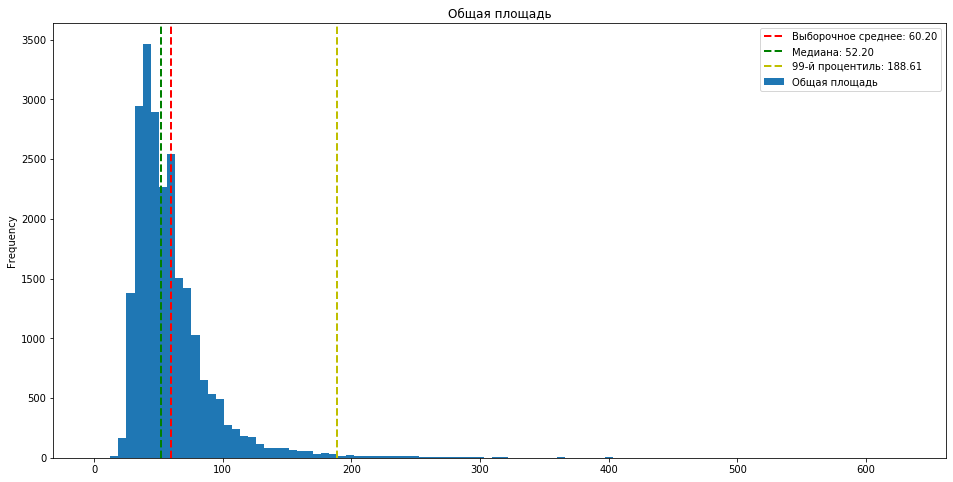

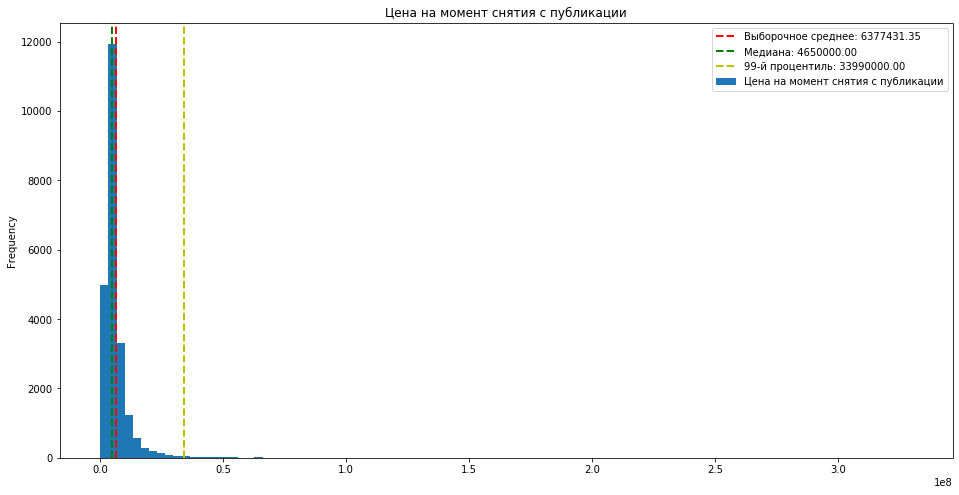

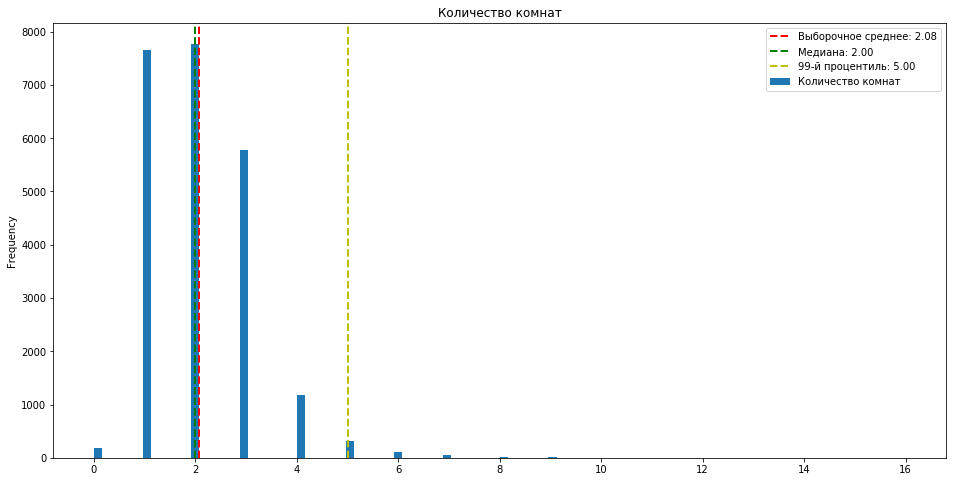

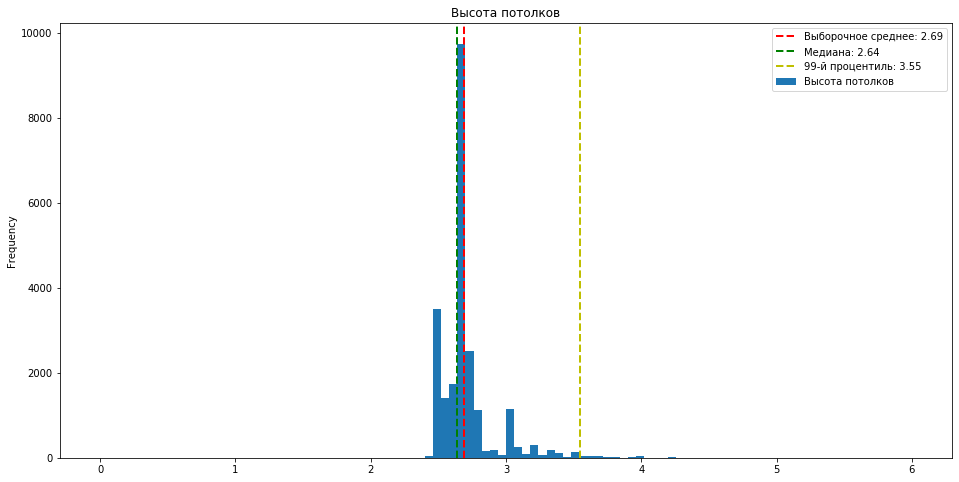

In [ ]:
for i,j in zip(list(colums.keys()), list(colums.values())):
    data.plot(y=i, title=j, kind='hist', bins=100, range = (0, data[i].max()), figsize=(16,8), label = j)
    plt.axvline(x=data[i].mean(), color='r', 
            linestyle='--', 
                linewidth=2, label=f'Выборочное среднее: {data[i].mean():.02f}')
    plt.axvline(x=data[i].median(), color='g', linestyle='--', linewidth=2,
                    label=f'Медиана: {data[i].median():.02f}')
    plt.axvline(np.percentile(data[i], 99), color='y', linestyle='--', linewidth=2, label=f'99-й процентиль: {np.percentile(data[i], 99):.02f}')
    plt.legend()
    plt.show()

**Анализ гистограмм признаков**: 
- значения признака `total_area` (общая площадь) ограничим значением 190 кв.м.;
- ограничим цену квартиры `last_price` (цена на момент снятия с публикации) 33990000 рублей;
- в оставшихся квартирах будет не менее 1 комнаты и не более 10 комнат -- признак `rooms`;
- высота потолка не более 4 м `ceiling_height`.

По некоторым признакам автор умышленно отступил от значения процентилей вправо с тем, чтобы далее не удалять большое количество записей.

## Гистограммы для времени продаж.

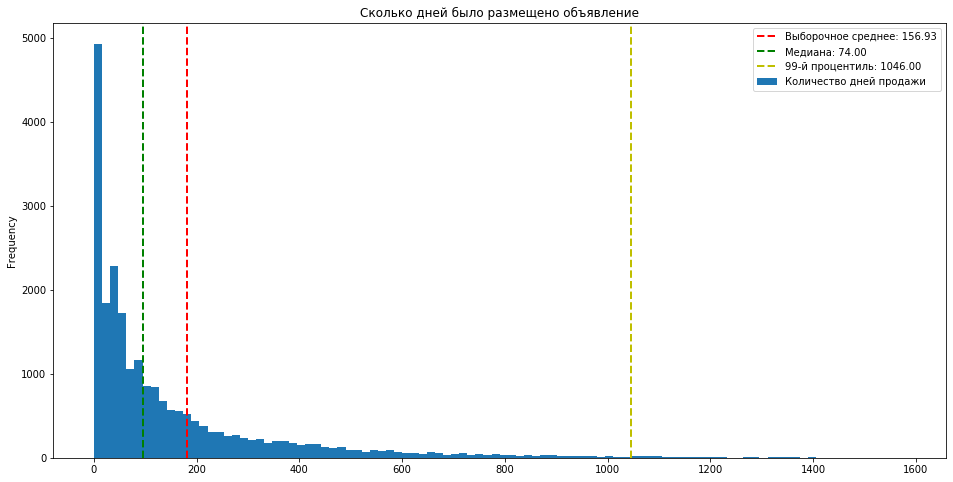

In [ ]:
data.plot(y='days_exposition', title='Cколько дней было размещено объявление', 
          kind='hist', bins=100, figsize=(16,8), label = 'Количество дней продажи')
data[data.days_exposition!=0]['days_exposition']
plt.axvline(x=data[data.days_exposition!=0]['days_exposition'].mean(), color='r', linestyle='--', 
                linewidth=2, label=f'Выборочное среднее: {data.days_exposition.mean():.02f}')
plt.axvline(x=data[data.days_exposition!=0]['days_exposition'].median(), color='g', linestyle='--', linewidth=2,
                    label=f'Медиана: {data.days_exposition.median():.02f}')
plt.axvline(np.percentile(data['days_exposition'], 99), color='y', linestyle='--', linewidth=2, label=f'99-й процентиль: {np.percentile(data.days_exposition, 99):.02f}')
plt.legend()
plt.show()

Дополнительно построим **круговую диаграмму** для **года завершения сделки** --- признак `year_name`

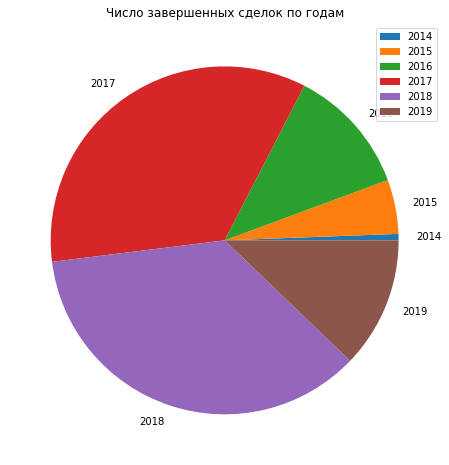

In [ ]:
data.groupby('year_name').agg(count=('year_name', 'count')).plot(y='count', kind='pie', 
                                                                 figsize=(8,8), 
                                                                 title='Число завершенных сделок по годам',
                                                                label='')

**Видим**, что в 2014 году было очень мало сделок. Удалим соответствующие записи.

### Удаление редких и выбивающиеся значений

Собрав выводы по гистограммам, запишем условия для формирования среза.

In [ ]:
data_itog = data[(data.total_area <= 190) & (data.last_price <= 33990000) & (data.rooms >= 1) &
                (data.rooms <= 10) & (data.ceiling_height <= 4) & 
                 (data.days_exposition <=1050) & (data.year_name >= 2015)].copy(deep=True)
print('Количество записей перед удалением -- {:d}.'.format(data.shape[0]))
print('Количество записей после удаления -- {:d}.'.format(data_itog.shape[0]))
print('Удалено {:.2%} записей.'.format((data.shape[0]-data_itog.shape[0])/data.shape[0]))

Количество записей перед удалением -- 23049.
Количество записей после удаления -- 22179.
Удалено 3.77% записей.


In [ ]:
data_itog.index = range(data_itog.shape[0])
data_itog.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,storey,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_name,month_name,year_name,storey_cat,living_total,kitchen_total
22174,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.00,8,False,...,1.0,675.0,239.0,73717.948718,пятница,август,2016,другой,0.641026,0.128205
22175,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,3.0,381.0,0.0,72490.845228,вторник,март,2017,другой,0.547792,0.103356
22176,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.64,5.0,38.00,4,False,...,0.0,5000.0,45.0,52542.372881,понедельник,январь,2018,другой,0.644068,0.144068
22177,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.64,3.0,29.70,1,False,...,0.0,5000.0,0.0,44091.710758,воскресенье,февраль,2018,первый,0.523810,0.094180
22178,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,47.45,12,False,...,3.0,196.0,602.0,149511.400651,вторник,март,2017,другой,0.618241,0.303583


## Влияние факторов на стоимость квартиры

### Зависимость цена от площади, числа комнат, удалённости от центра

Для оценки зависимости построим матрицу диаграмм рассеивания и рассчитаем частные коэффициенты корреляции.  

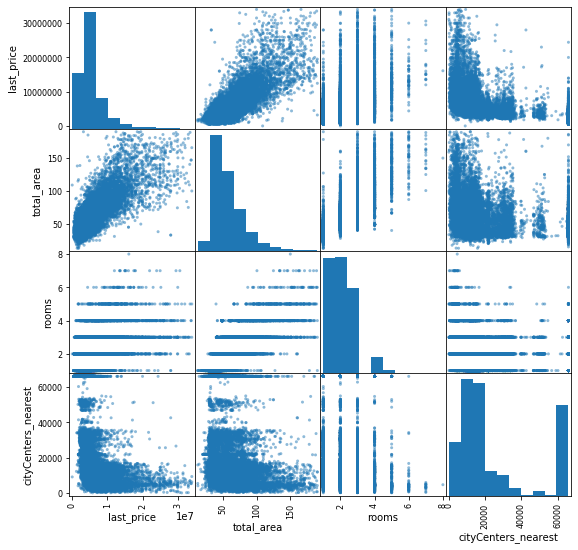

In [ ]:
pd.plotting.scatter_matrix(data_itog[['last_price', 'total_area','rooms','cityCenters_nearest']], figsize=(9, 9));

In [ ]:
data_itog[['last_price', 'total_area','rooms','cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.779888,0.484779,-0.450392
total_area,0.779888,1.000000,0.789616,-0.208113
rooms,0.484779,0.789616,1.000000,-0.119097
cityCenters_nearest,-0.450392,-0.208113,-0.119097,1.000000


<a class="anchor" id="ex1"></a>
**Вывод:** На диаграмме рассеивания (первая строка второй столбец) видно, что 
- точки, соответствующие **цене и площади**, вытянуты вдоль диагонали первого октанта, можно сделать вывод о наличии положительной линейной связи между эти признаки, чем больше площадь, тем выше цена. Этот вывод подтвержается и высоким коэффициентом частной корреляции между этими признаками $0.78$; 
- точки, соответствующие **цене и количеству комнат**, сконцетрированы примерно в центре первого октанта, ярко выраженной линейной зависимости не наблюдается. Можно сделать вывож о сонаправленности изменений этих признаков -- квартиры, с большим числом комнат, будут дороже, но, повторюсь, характер этих изменений не является линейным. Об этом свидетельствует и значение коэффициента частной корреляции между этими признаками $0.49$;
- точки, соответствующие **цене и удалённости от центра**, сконцентрированы вдоль координатных осей, значение коэффициента частной корреляции между этими признаками $-0.45$ свидетельствует о наличии межуд признаками обратной связи: чем дальше квартира будет от центра населенного пункта, тем она будет дешевле, и, наоборот.

**Общий промежуточный вывод**: факторы площади и удаленности от центра оказывают влияние на цену квартиры, предпочтительнее квартиры большей площади, находящиеся в непосредственной близости от центра населенного пункта. Количество комнат не самый значимый параметр: видимо рассуждения такие, была бы площадь, а комнат можно сделать необходимое количество.      

### Зависимость цены от этажа, на котором расположена квартира: первом, последнем, другом или в одноэтажном доме

Признак `last_price` (цена на момент снятия с публикации) является интервальным, а признак `storey_cat` (этаж, на котором находится квартира) является категориальным. 

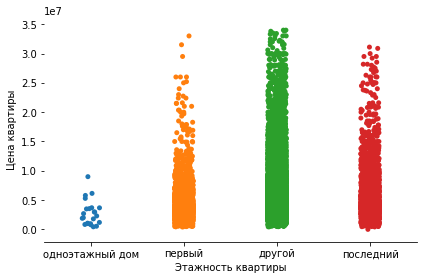

In [ ]:
g = sns.catplot(x="storey_cat", y="last_price", data = data_itog, 
                height=4,
                aspect=1.5,
                order = ['одноэтажный дом', 'первый', 'другой', 'последний'])
(g.set_axis_labels("Этажность квартиры", "Цена квартиры")
  .despine(left=True))  

**Общий промежуточный вывод**: тот случай, когда наличие визуализации делает бессмысленные какие-либо слова. Для порядка, тем не менее, скажем несколько слов: стоимость квартир, находящихся на промежуточных этажах, выше, чем на других. На первом этаже есть дорогие квартиры, возможно у них большая площадь. Однако, можно заметить в большинстве случае квартиры на последнем этаже дороже, чем на первом. Ну и частный сектор совсем не пользуется спросом. 

### Зависимость цены от даты размещения: дня недели, месяца и года

Поскольку признаки `weekday_name`, `month_name`, `year_name` являются категориальными, то применим те же технику, что и в предыдущем пункте -- метод `.catplot()` из библиотеки `seaborn`. Для разнообразия попробуем разные параметры этого метода.

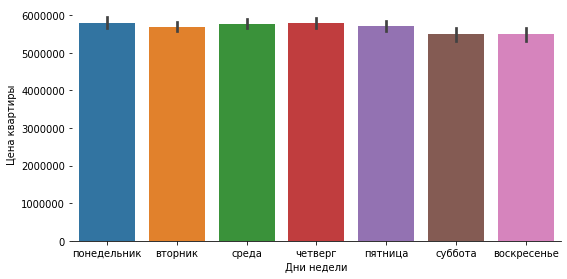

In [ ]:
order_days = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
g = sns.catplot(x="weekday_name", y="last_price", data = data_itog, 
                height=4,
                aspect=2,
                kind="bar",
                order = order_days)
(g.set_axis_labels("Дни недели", "Цена квартиры")
  .despine(left=True))  

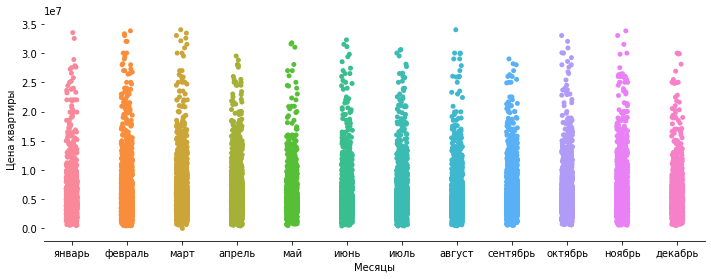

In [ ]:
order_month = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 
               'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
g = sns.catplot(x="month_name", y="last_price", data = data_itog, 
                height=4,
                aspect=2.5,
                order = order_month)
(g.set_axis_labels("Месяцы", "Цена квартиры")
  .despine(left=True)) 

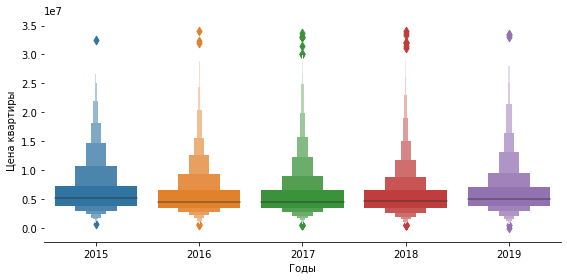

In [ ]:
g = sns.catplot(x="year_name", y="last_price", data = data_itog, 
                height=4,
                aspect=2,
                kind='boxen')
(g.set_axis_labels("Годы", "Цена квартиры")
  .despine(left=True)) 

### Зависимость цены от числа комнат

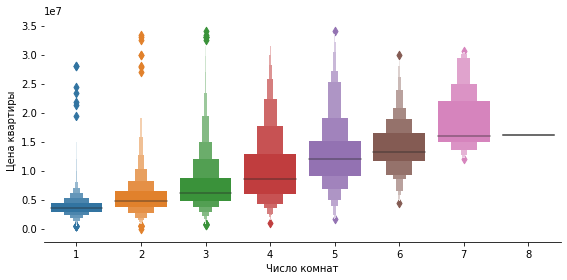

In [ ]:
g = sns.catplot(x="rooms", y="last_price", data = data_itog, 
                height=4,
                aspect=2,
                kind='boxen')
(g.set_axis_labels("Число комнат", "Цена квартиры")
  .despine(left=True)) 

### 10 населённых пунктов с наибольшим числом объявлений
Воспользуемся механизмом группировки с указанием операций для интересующего признака 
для выделения 10 населённых пунктов с наибольшим числом объявлений, а также для расчета средней цены квадратного метра в этих населённых пунктах. 

Выделите населённые пункты с самой высокой и низкой стоимостью жилья

In [ ]:
best_count= data_itog.groupby('locality_name').agg(
                                                  count=('locality_name', 'count'),
                                                  mean_price_square_meter=('price_square_meter', 'mean')) 
best_count.sort_values(by='count', ascending=False, inplace = True)
best_ten = best_count.iloc[:10]
print(best_ten)

                   count  mean_price_square_meter
locality_name                                    
Санкт-Петербург    14662            110314.182970
поселок Мурино       495             84853.692410
поселок Шушары       418             77617.127821
Всеволожск           377             68692.770590
Пушкин               349            102861.929086
Колпино              330             75253.103115
поселок Парголово    300             89753.187451
Гатчина              300             69028.719516
деревня Кудрово      272             92401.578046
Выборг               231             58068.557250


### Населённые пункты с самой высокой и низкой стоимостью жилья

Воспользуемся методами `.nsmallest()` и `.nlargest()`. Посмотреть можно [**здесь**](https://habr.com/ru/company/ruvds/blog/479276/)


In [ ]:
print('{:s} - населенный пункт с самой высокой стоимостью кв. м.'.format(best_ten.nlargest(1, 'mean_price_square_meter').index.to_list()[0]))
print('{:s} - населенный пункт с самой низкой стоимостью кв. м.'.format(best_ten.nsmallest(1, 'mean_price_square_meter').index.to_list()[0]))

Санкт-Петербург - населенный пункт с самой высокой стоимостью кв. м.
Выборг - населенный пункт с самой низкой стоимостью кв. м.


### Квартиры в Санкт-Петербурге

1. Создаем столбец с расстоянием до центра в километрах, округленных до целых значений. 
2. Считаем среднюю цену для каждого километра. 
3. Постройте график, отражающий изменение цены зависит от удалённости от центра.
4. Опредяем границу, где график сильно меняется — это и будет центральная зона. 

In [ ]:
data_itog['cityCenters_nearest_km'] = round(data_itog['cityCenters_nearest']/1000)
print(data_itog)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
4                10   2890000.0       30.40  2018-09-10T00:00:00      1   
...             ...         ...         ...                  ...    ...   
22174             9   4600000.0       62.40  2016-08-05T00:00:00      3   
22175             9   9700000.0      133.81  2017-03-21T00:00:00      3   
22176            14   3100000.0       59.00  2018-01-15T00:00:00      3   
22177            18   2500000.0       56.70  2018-02-11T00:00:00      2   
22178            13  11475000.0       76.75  2017-03-28T00:00:00      2   

       ceiling_height  floors_total  living_area  storey  is_apartment  ...  \
0                2.7

Для определения **радиуса центра Санкт-Петербурга** рассчитаем описательные статистики

In [ ]:
data_itog['cityCenters_nearest_km'].describe()

count    22179.000000
mean        25.359214
std         22.258804
min          0.000000
25%         11.000000
50%         15.000000
75%         32.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

Видим, что половина значений лежит **левее 15**. Построим как меняется цена в радиусе 15 км.

In [ ]:
df_SPb = data_itog[(data_itog.locality_name == 'Санкт-Петербург') &
                 (data_itog.cityCenters_nearest_km <= 15)].groupby('cityCenters_nearest_km') \
                 .agg(price_square_meter=('price_square_meter', 'mean'))
print(df_SPb)

                        price_square_meter
cityCenters_nearest_km                    
0.0                          152246.423771
1.0                          143638.840697
2.0                          127915.819976
3.0                          116763.975631
4.0                          125031.974544
5.0                          132330.585423
6.0                          132488.893707
7.0                          133278.887461
8.0                          123012.992210
9.0                          111721.608256
10.0                         112553.119710
11.0                         107397.782691
12.0                         107781.872099
13.0                         107646.141009
14.0                         103748.617810
15.0                         103918.521922


Посколько в течении года средняя цена не меняется, то будем строить ступенчатый график с помощью метода `.step()`. Визуально определим границу радиуса центра и проведем соответствующую вертикальную линию.

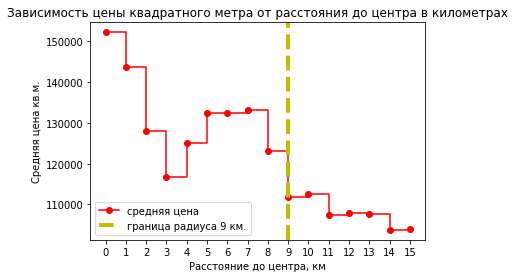

In [ ]:
plt.step(df_SPb.index, df_SPb.price_square_meter,'o-r', where='post', label = 'средняя цена')
plt.title('Зависимость цены квадратного метра от расстояния до центра в километрах')
plt.xticks(df_SPb.index)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена кв.м.')
plt.axvline(9, color='y', linestyle='--', linewidth=4, label='граница радиуса {:d} км.'.format(9))
plt.legend()
plt.show()


**Вывод:** С использованием описательных статистик и графического анализа определен радиус центра города для Санкт-Петербурга. Он составляет 9 км.    

### Исследование центра Санкт-Петербурга
1. Выделяем сегмент квартир в центре.
2. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. 
3. Выделяем факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
4. Делаем выводы по отличию от общих выводов по всему городу.


**Квартиры в центре**

In [ ]:
df_SPb_center = data_itog[(data_itog.locality_name == 'Санкт-Петербург') &
                 (data_itog.cityCenters_nearest_km <= 9)]

**Анализ параметров: площадь, цена, число комнат, высота потолков**

In [ ]:
df_SPb_center[['total_area','last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,4163.000000,4.163000e+03,4163.000000,4163.000000
mean,76.374132,9.652789e+06,2.533750,2.864192
std,33.169464,5.591185e+06,1.126332,0.308995
min,13.000000,1.219000e+04,1.000000,2.400000
25%,50.300000,5.850000e+06,2.000000,2.640000
50%,70.000000,8.000000e+06,2.000000,2.710000
75%,95.000000,1.181484e+07,3.000000,3.000000
max,190.000000,3.399000e+07,8.000000,4.000000


Центр Санкт-Петербурга ничем не удивил, кроме размахом цены. В большинстве своем квартиры небольшие по площади до 100 кв.м. с небольшим числом комнат и не высокими потолками стоят от 12 тыс.руб до 11.8 млн.руб. Здорово!  

**Влияние на стоимость квартиры факторов: общая площадь, число комнат, высота потолков и удалённость от центра**

Для оценки характера и степени влияния указанных факторов на стоимость квартиры построим матрицу диаграмм рассеивания и рассчитаем частные коэффициенты корреляции.

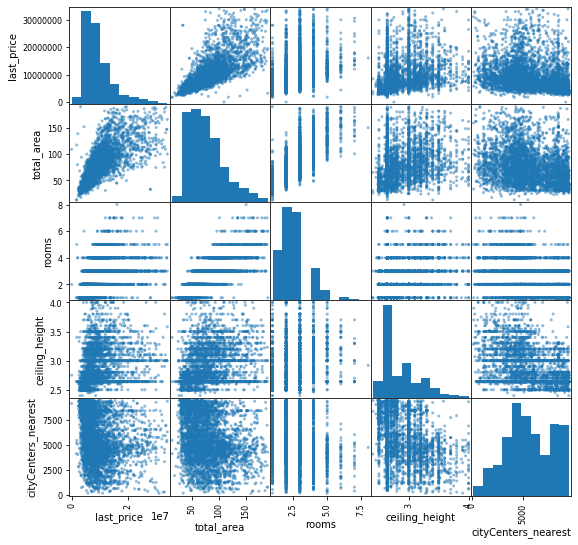

In [ ]:
pd.plotting.scatter_matrix(df_SPb_center[['last_price', 'total_area', 'rooms', 
                                          'ceiling_height', 'cityCenters_nearest']], figsize=(9, 9));

In [ ]:
df_SPb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.748308,0.457442,0.246589,-0.206728
total_area,0.748308,1.000000,0.790602,0.299031,-0.267461
rooms,0.457442,0.790602,1.000000,0.254460,-0.263436
ceiling_height,0.246589,0.299031,0.254460,1.000000,-0.314246
cityCenters_nearest,-0.206728,-0.267461,-0.263436,-0.314246,1.000000


**Вывод:** В целом [**выводы**](#ex1), полученные выше по всей выборке, можно было бы переписать практически без изменений здесь. Однако, для квартир центра Санкт-Петербурга необходимо отметить следующие особенности:
- невелика значимость высоты потолка точки
- существеннос снизилось негативное воздействие на цену квартиры такого фактора как удаленность от центра, наверное, потому что мы уже в центре.

Повторимся, что общая площадь и число комнат оказывают положительно влияние на стоимость квартиры. При этом полученные значения парных коэффициентов корреляции практически не поменялись по отношению коэффициентам по всей выборке.  


**Влияние этажа квартиры на ее стоимость**

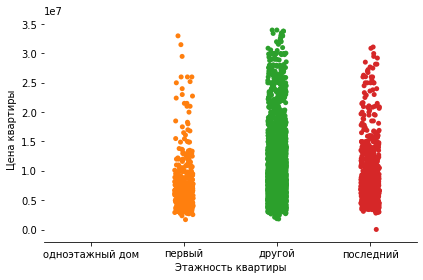

In [ ]:
g = sns.catplot(x="storey_cat", y="last_price", data = df_SPb_center, 
                height=4,
                aspect=1.5,
               order = ['одноэтажный дом', 'первый', 'другой', 'последний'])
(g.set_axis_labels("Этажность квартиры", "Цена квартиры")
  .despine(left=True)) 

**Вывод**: И в центре Санкт-Петербурга больше покупают квартир на промежуточных этажах. И автор только сообразил, что в многоэтажном доме квартир, находящихся на промежуточных этажах просто больше, чем на первом и последнем этажах. Видим, что снова в большинстве своем квартиры на последнем этаже стоят чуть-чуть дороже, чем на первом. В целом можно сказать, что закономерности сохранены. 

**Зависимость цены от даты размещения: дня недели, месяца и года**

*День недели и цена*

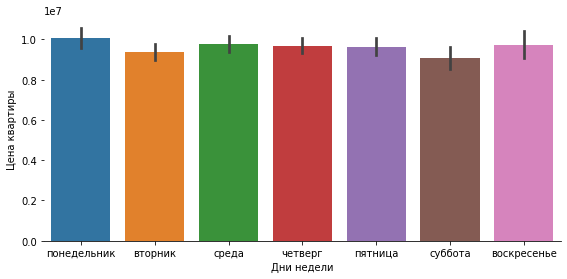

In [ ]:
g = sns.catplot(x="weekday_name", y="last_price", data = df_SPb_center, 
                height=4,
                aspect=2,
                kind="bar",
                order=order_days)
(g.set_axis_labels("Дни недели", "Цена квартиры")
  .despine(left=True))  

*Месяц и цена*

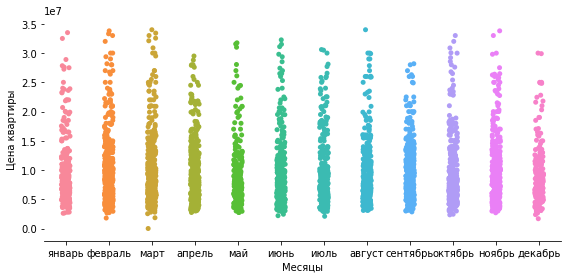

In [ ]:
g = sns.catplot(x="month_name", y="last_price", data = df_SPb_center, 
                height=4,
                aspect=2,
                order = order_month)
(g.set_axis_labels("Месяцы", "Цена квартиры")
  .despine(left=True)) 

*Год и цена*

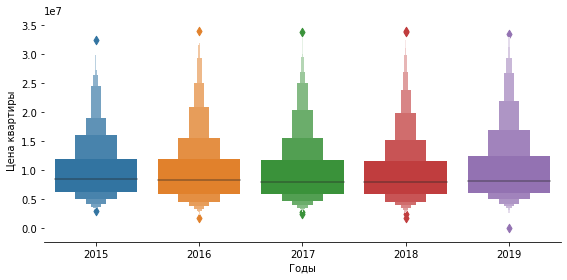

In [ ]:
g = sns.catplot(x="year_name", y="last_price", data = df_SPb_center, 
                height=4,
                aspect=2,
                kind='boxen')
(g.set_axis_labels("Годы", "Цена квартиры")
  .despine(left=True)) 

*Число комнат и цена*

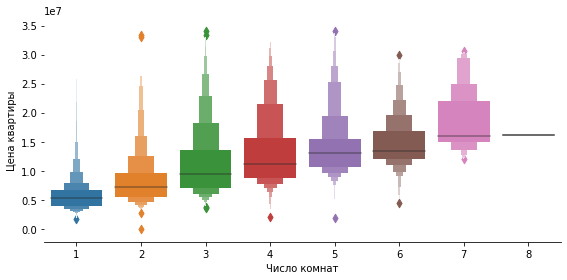

In [ ]:
g = sns.catplot(x="rooms", y="last_price", data = df_SPb_center, 
                height=4,
                aspect=2,
                kind='boxen')
(g.set_axis_labels("Число комнат", "Цена квартиры")
  .despine(left=True)) 

**Вывод по квартирам центра Санкт-Петербурга:** Как и ранее ключевыми параметрами, определяющие стоимость квартиры в центре Санкт-Петербурга, являются общая площадь, число комнат и близость к центру. Первые два фактора оказывают позитивное воздествие на цену: с ростом значений этих факторов, особенно площади, растет и цена. По мере удаления от центра стоимость квартиры снижается, но для квартир из центра эта тенденция очень слабая. Дата (день, месяц, год) не значительно влияет на стоимость квартиры.

## Вывод по шагу 4. По результатам проведенного исследовательского анализа данных сделаем следующие выводы:
1. Стоимость квартиры зависит от ее площади, этажа, количества комнат и удаленности от центра. С ростом первых трех факторов наблюдается рост стоимости квартиры, а вот по мере удаления от центра населенного пункта стоимости квартиры снижается.
2. Результаты анализа стоимости квартир по центру Санкт-Петербурга оказались подобными результам анализа по всей выборке. Стоит лишь отметить, что снизилась степень воздействия фактора удаленности от центра.
3. Правильно подобранные типы графиков позволяют максимально быстро сформировать представление о полученных количественных резульататах.   